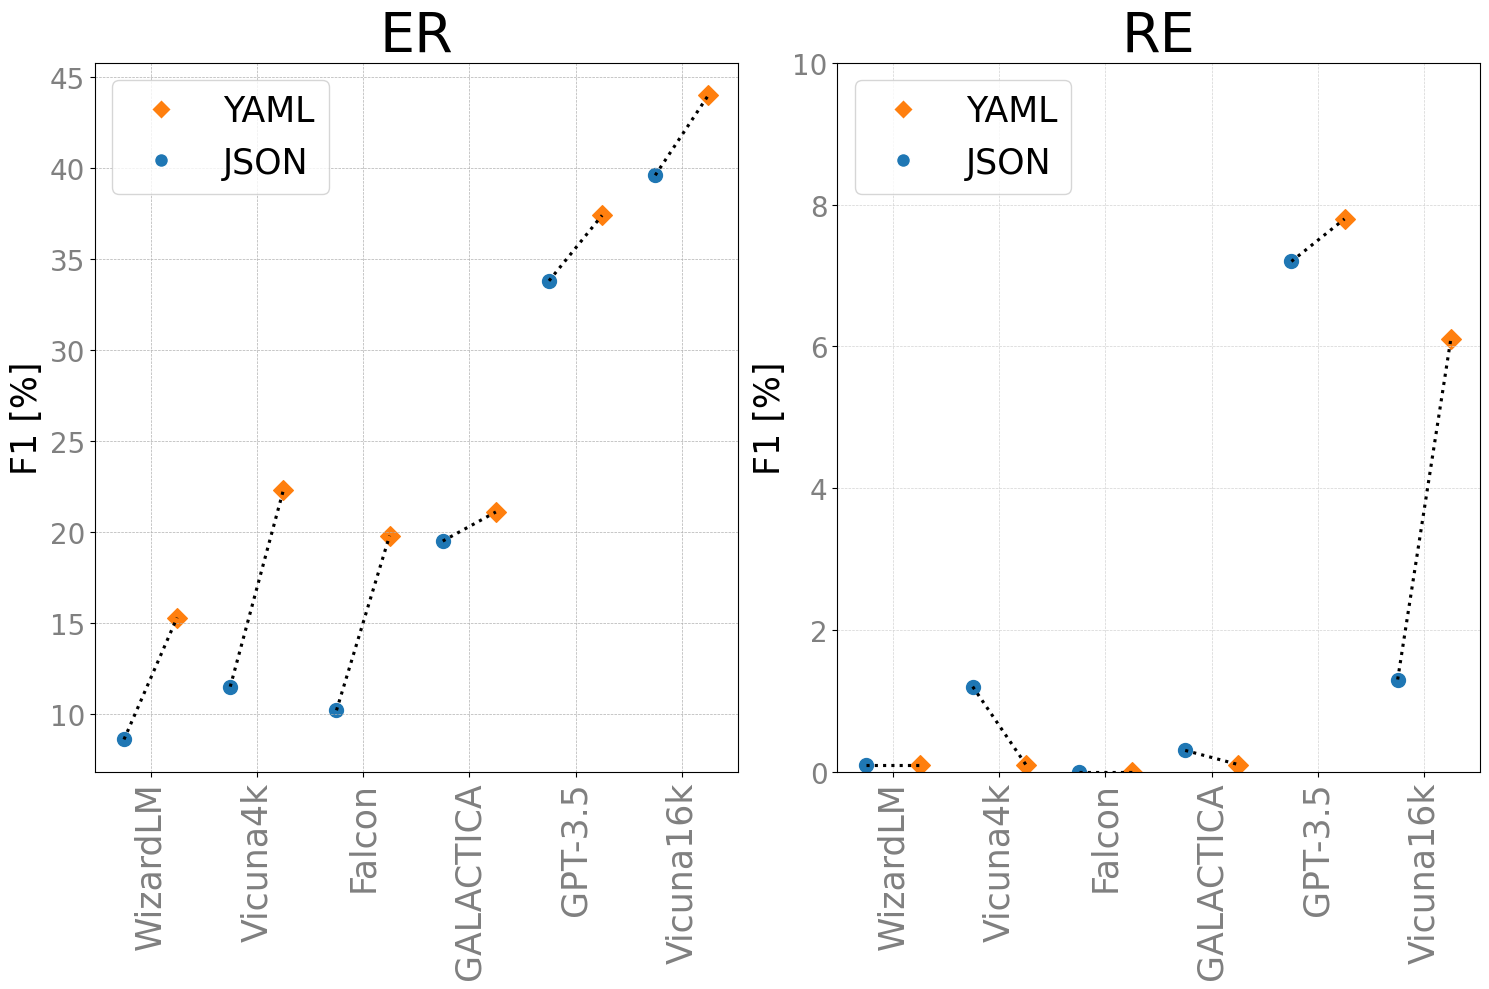

In [49]:
import matplotlib.pyplot as plt

# Data from the LaTeX table
models = ["WizardLM", "Vicuna4k", "Falcon", "GALACTICA", "GPT-3.5", "Vicuna16k"]
json_scores_er = [8.6, 11.5, 10.2, 19.5, 33.8, 39.6]
yaml_scores_er = [15.3, 22.3, 19.8, 21.1, 37.4, 44.0]
json_scores_re = [0.1, 1.2, 0.0, 0.3, 7.2, 1.3]
yaml_scores_re = [0.1, 0.1, 0.0, 0.1, 7.8, 6.1]

# Setup plot with appropriate spacing
fig, ax = plt.subplots(1, 2, figsize=(15, 10), dpi=100)

# Colors and marker styles
json_color = plt.get_cmap('tab10')(0)  # First color for JSON
yaml_color = plt.get_cmap('tab10')(1)  # Second color for YAML
line_style = {'linestyle': ':', 'color': 'black', 'linewidth': 2.25}  # Black dotted line

# Plotting configurations
for i, model in enumerate(models):
    pos_json = i * 2
    pos_yaml = i * 2 + 1

    # Entity Recognition (ER) plot
    ax[0].plot([pos_json, pos_yaml], [json_scores_er[i], yaml_scores_er[i]], **line_style)
    ax[0].scatter(pos_json, json_scores_er[i], color=json_color, marker='o', s=100)
    ax[0].scatter(pos_yaml, yaml_scores_er[i], color=yaml_color, marker='D', s=100)
    ax[0].grid(True, linestyle='--', linewidth=0.5, zorder=0)  # Adding grid
    
    # Relation Extraction (RE) plot
    ax[1].plot([pos_json, pos_yaml], [json_scores_re[i], yaml_scores_re[i]], **line_style)
    ax[1].scatter(pos_json, json_scores_re[i], color=json_color, marker='o', s=100)
    ax[1].scatter(pos_yaml, yaml_scores_re[i], color=yaml_color, marker='D', s=100)
    ax[1].grid(True, linestyle='--', linewidth=0.5, zorder=0, color='lightgrey')  # Adding grid


# Customizing axes and labels
for a in ax:
    a.set_xticks([i + 0.5 for i in range(0, len(models) * 2, 2)])  # Positioning x-ticks between JSON/YAML pairs
    a.set_xticklabels(models, rotation=90, ha="center", fontsize=25, color='grey')  # Model labels
    a.set_ylabel('F1 [%]', fontsize=25)  # Y-axis labels
    a.tick_params(axis='y', labelsize=20, labelcolor='grey')
    

# Legend configuration
legend_elements = [
    plt.Line2D([0], [0], marker='D', color='w', label='YAML', markerfacecolor=yaml_color, markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='JSON', markerfacecolor=json_color, markersize=10)
]
ax[0].legend(handles=legend_elements, fontsize=25, loc='upper left')
ax[1].legend(handles=legend_elements, fontsize=25, loc='upper left')

# Setting plot titles and RE y-axis limit
ax[0].set_title('ER', fontsize=40)
ax[1].set_title('RE', fontsize=40)
ax[1].set_ylim(0, 10)

plt.tight_layout()
plt.savefig('hyperpie_results.pdf')